<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287597 entries, 0 to 287596
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            287597 non-null  int64         
 1   Referencia      287597 non-null  int64         
 2   Fecha_Fact      273899 non-null  datetime64[ns]
 3   Fecha_Apertura  287597 non-null  datetime64[ns]
 4   Cta_Cargo       283357 non-null  object        
 5   Nombre_Cliente  287596 non-null  object        
 6   Cta_Titular     287566 non-null  object        
 7   Nombre_Titular  287565 non-null  object        
 8   Recamb          287597 non-null  float64       
 9   Recamb_Pvp      287597 non-null  float64       
 10  Tiemp_Fact      287592 non-null  float64       
 11  Total_Mo        287592 non-null  float64       
 12  Modelo          286311 non-null  object        
 13  Recep           287597 non-null  object        
 14  Matricula       287597 non-null  obj

In [68]:
# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2021-12-31")]

In [69]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [70]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)

In [71]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [72]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180,2015,1,2,4
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715,2015,1,2,4
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744,2015,1,2,4


In [73]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [74]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180,2015,1,2,4
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715,2015,1,2,4
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744,2015,1,2,4


In [75]:
df.shape

(242305, 28)

In [76]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        0
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
year              0
month             0
day               0
day_of_week       0
dtype: int64

In [77]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

168191

In [78]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

55220

In [79]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    242305.000000
mean        344.566355
std         416.301841
min           0.000000
25%          87.040000
50%         210.980000
75%         433.060000
max        3198.870000
Name: Fact_total, dtype: float64

In [80]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(242305, 28)

In [81]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2021-12-30 00:00:00


In [82]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    242305.000000
mean        344.566355
std         416.301841
min           0.000000
25%          87.040000
50%         210.980000
75%         433.060000
90%         785.120000
95%        1158.544000
99%        2166.676800
max        3198.870000
Name: Fact_total, dtype: float64

In [83]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

55220

In [84]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.211659
2V O.R.CLIENT MEC VW         0.144070
6A O.R. INTER MEC.AUDI       0.112396
7A PRESUPUESTO CH AUDI       0.108710
4A GARANTIA MECAN AUDI       0.096655
6V O.R. INTER MEC.VW         0.078096
7V PRESUPUESTO CH VW         0.072417
4V GARANTIA MECAN VW         0.062640
11LV O.R. MEC VW LONG DRI    0.031898
11LA O.R. MEC AU LONG DRI    0.026421
2A O.R.CLIENT MEC AUDI-CO    0.016298
2V O.R.CLIENT MEC VW-CONT    0.010784
7LA PRES  AU CH  LONG DRI    0.003945
6L O.R. INTER MEC LCV        0.003483
1A O.R.CLIENT CH AUDI        0.002716
DG DEFER.GARANTIA AUDI       0.002621
2L O.R.CLIENT MEC LCV        0.002311
7LV PRES  VW CH  LONG DRI    0.002138
GD DEFER.GARANTIA MECAN V    0.001750
2RA O.R.CLIENT MEC AUDI -    0.001482
4L GARANTIA MECAN LCV        0.001341
12LA O.R. MEC AU VW RENTI    0.001106
2RV O.R.CLIENT MEC VW-CRE    0.001090
1V O.R.CLIENT CH VW          0.000941
11LL O.R. MEC LCV LONG DR    0.000759
12LV O.R. MEC VW VW RENTI    0.000660
7L PRESUPUES

In [85]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

36

In [86]:
# voy a quitar las internas. 
df[df["Tipo_Or"].str.startswith("5" or "6")==True]

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week


In [87]:
df = df[df["Tipo_Or"].str.startswith("5" or "6")!=True]

In [88]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

55220

In [89]:
df.shape # tenemos 274.898 filas

(242305, 28)

In [90]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        0
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
year              0
month             0
day               0
day_of_week       0
dtype: int64

In [91]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(242305, 28)

In [92]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [93]:
df.Bastidor.nunique() #58058 bastidores. 

55220

In [94]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242305 entries, 7 to 284803
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            242305 non-null  object        
 1   Referencia      242305 non-null  object        
 2   Fecha_Fact      242305 non-null  datetime64[ns]
 3   Fecha_Apertura  242305 non-null  datetime64[ns]
 4   Cta_Cargo       242305 non-null  object        
 5   Nombre_Cliente  242305 non-null  object        
 6   Cta_Titular     242305 non-null  object        
 7   Nombre_Titular  242305 non-null  object        
 8   Recamb          242305 non-null  float64       
 9   Recamb_Pvp      242305 non-null  float64       
 10  Tiemp_Fact      242305 non-null  float64       
 11  Total_Mo        242305 non-null  float64       
 12  Modelo          242305 non-null  object        
 13  Recep           242305 non-null  object        
 14  Matricula       242305 non-null  obj

In [95]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        0
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
year              0
month             0
day               0
day_of_week       0
dtype: int64

In [96]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [97]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4


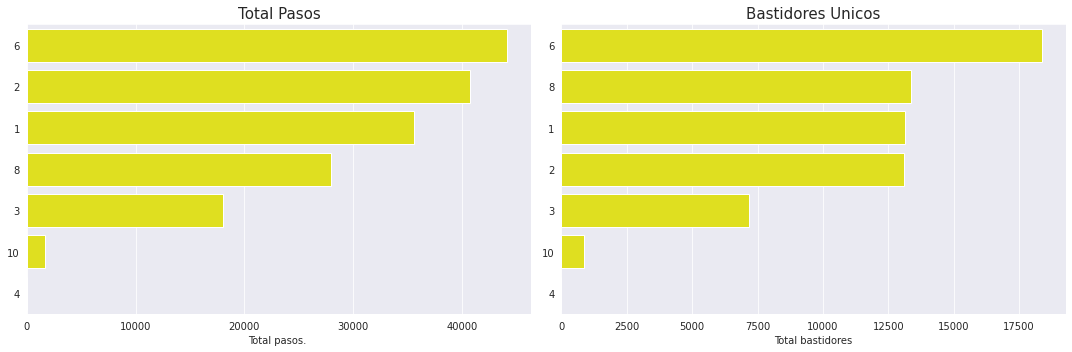

In [98]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [99]:
df.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6     18361
8     13349
1     13124
2     13111
3      7158
10      875
4         1
Name: Bastidor, dtype: int64

In [101]:
df.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6     44153
2     40754
1     35625
8     27990
3     18033
10     1637
4         1
Name: Orden_Corta2, dtype: int64

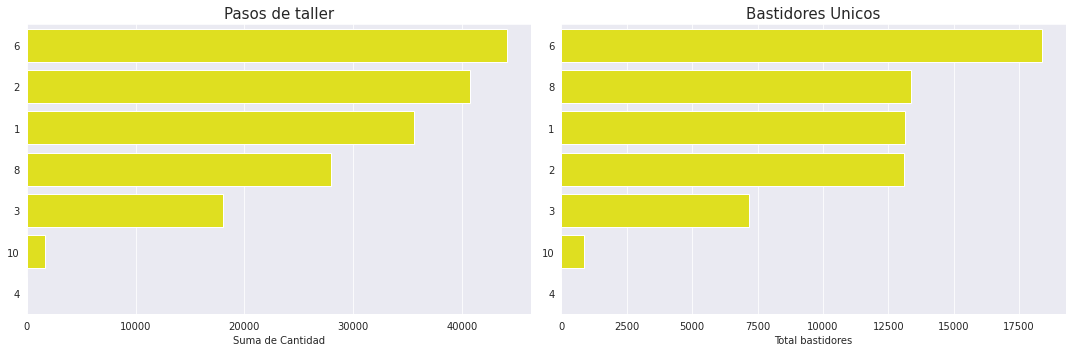

In [102]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [103]:
df.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6     18361
8     13349
1     13124
2     13111
3      7158
10      875
4         1
Name: Bastidor, dtype: int64

In [104]:
df.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
6     23879026.52
1     21848071.35
2     19149987.31
8     10346577.34
3      7631384.28
10      635103.79
4            0.00
Name: Fact_total, dtype: float64

In [105]:
df.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    18281
2018    18234
2017    17946
2021    17052
2020    16378
2016    15857
2015    14368
Name: Bastidor, dtype: int64

In [106]:
# si quiero agrupar por mas de una variable se hace así. 
df.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
6     2019    5017
2     2015    4951
6     2018    4801
      2021    4791
      2020    4770
      2017    4500
2     2017    4470
      2016    4300
1     2017    4208
2     2018    4194
1     2018    4157
6     2016    4143
2     2019    4015
1     2019    3940
2     2021    3820
6     2015    3748
8     2018    3729
1     2016    3638
8     2021    3586
1     2021    3542
8     2019    3529
2     2020    3483
8     2017    3444
1     2020    3378
      2015    3324
8     2020    3167
      2016    2618
3     2017    2237
      2019    2210
      2018    2154
      2015    2023
      2016    1977
      2020    1887
      2021    1715
8     2015    1169
10    2019     394
      2021     389
      2020     366
      2018      84
4     2020       1
Name: Bastidor, dtype: int64

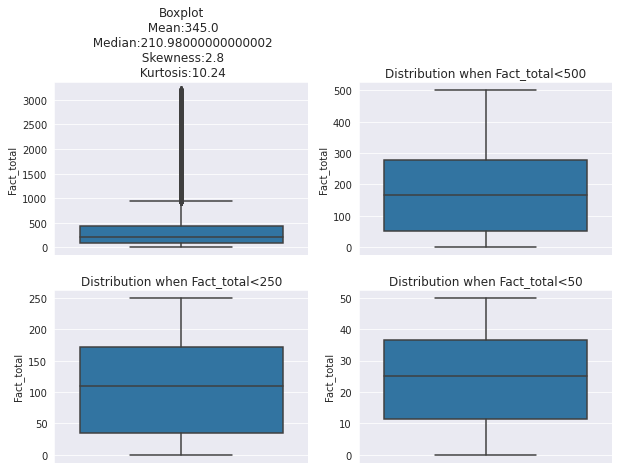

In [107]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df.Fact_total),0) # calculamos la media
median = np.median(df.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [108]:
# vamos a quitar todos los totales superiores a 5.000
df = df[df["Fact_total"]<1100]


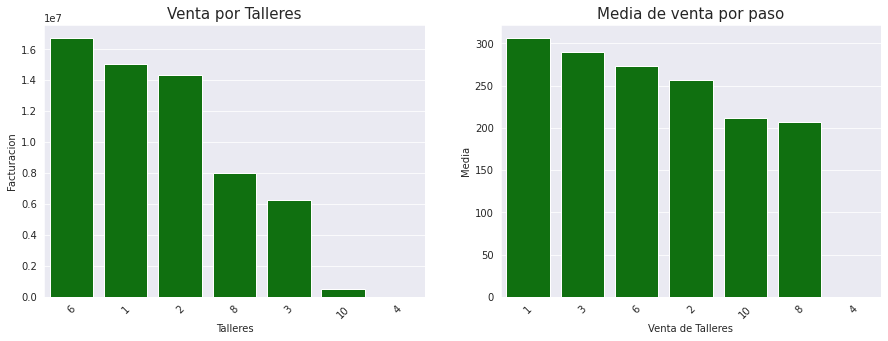

In [109]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [110]:
df.Fact_total.mean() # esta es la media de todos los valores. 

265.9382879453946

In [55]:
print(df[df["Tall"]=="1"]["Fact_total"].mean())
print(df[df["Tall"]=="6"]["Fact_total"].mean())
print(df[df["Tall"]=="3"]["Fact_total"].mean())
print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())

416.04649657394793
365.85296674714033
342.73558421340516
329.91372117971054
275.35995277878675
260.260727179079


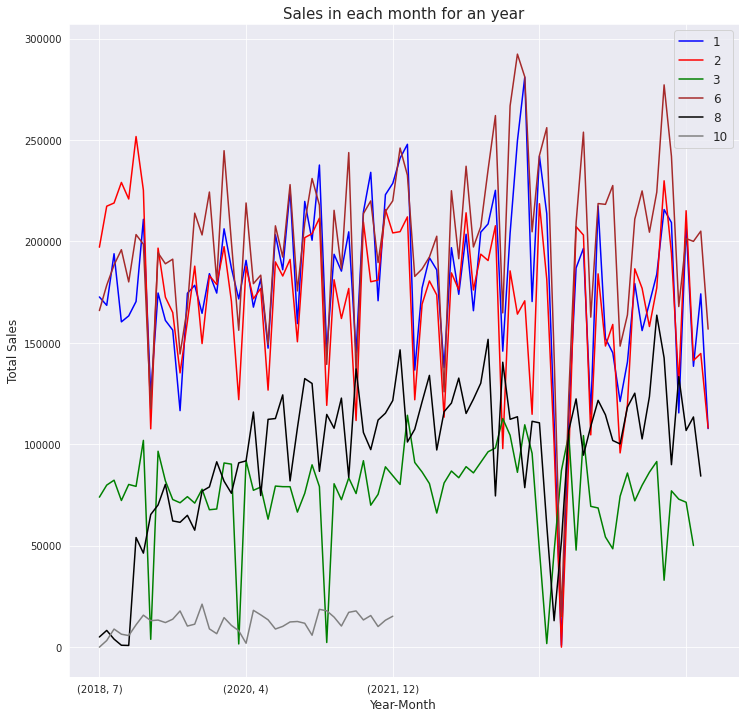

In [111]:
plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

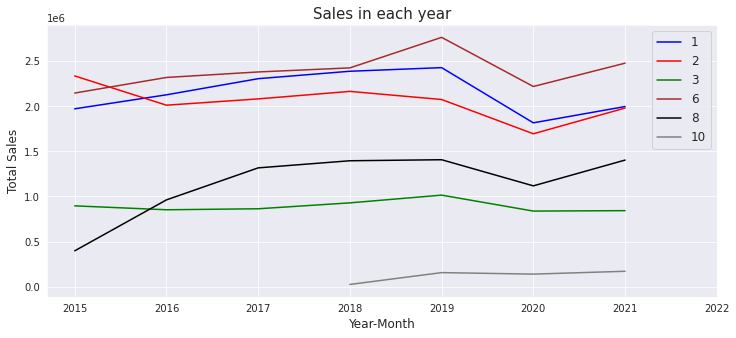

In [112]:
plt.figure(figsize=(12,5))
df[df['Tall']=='1'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

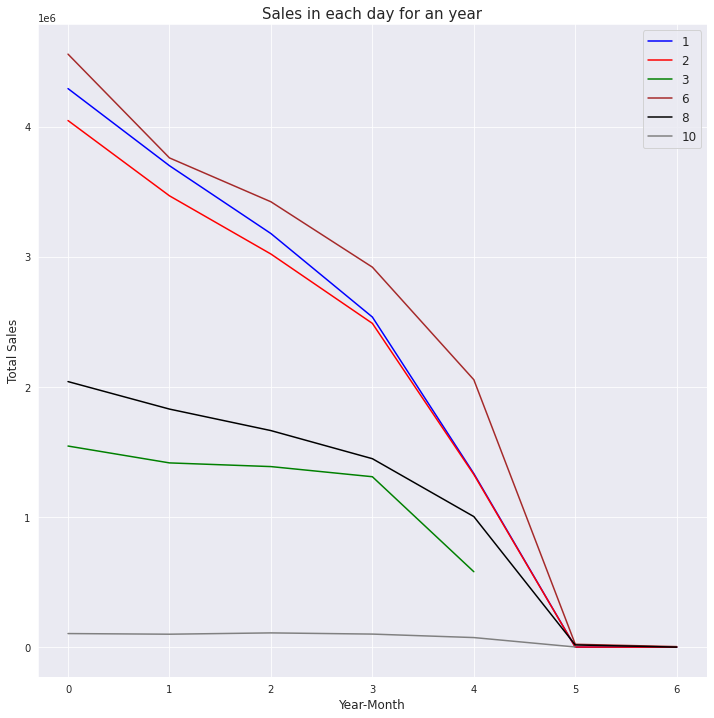

In [113]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()

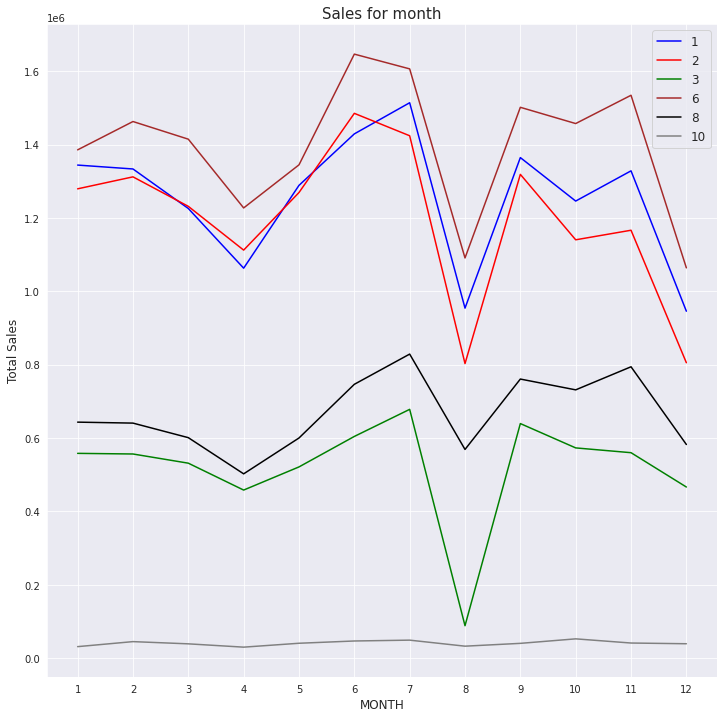

In [116]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

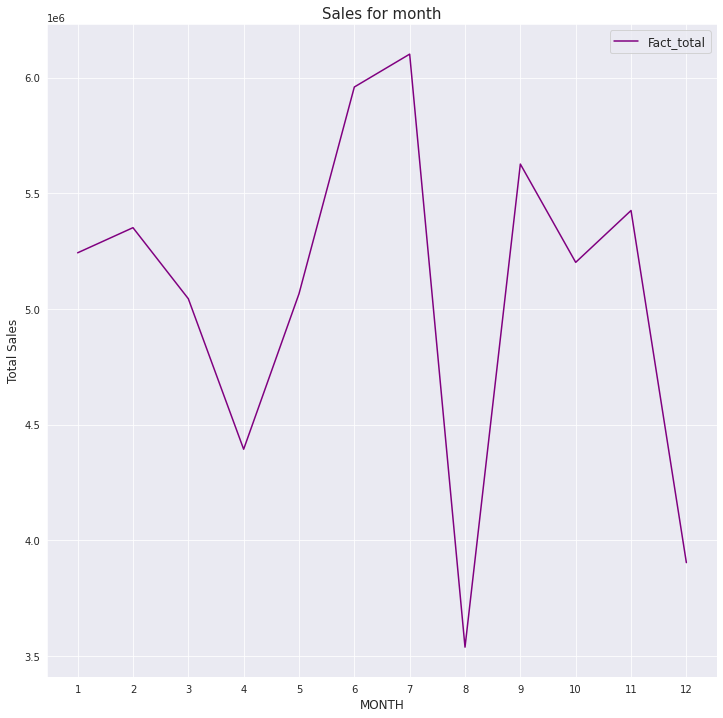

In [120]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

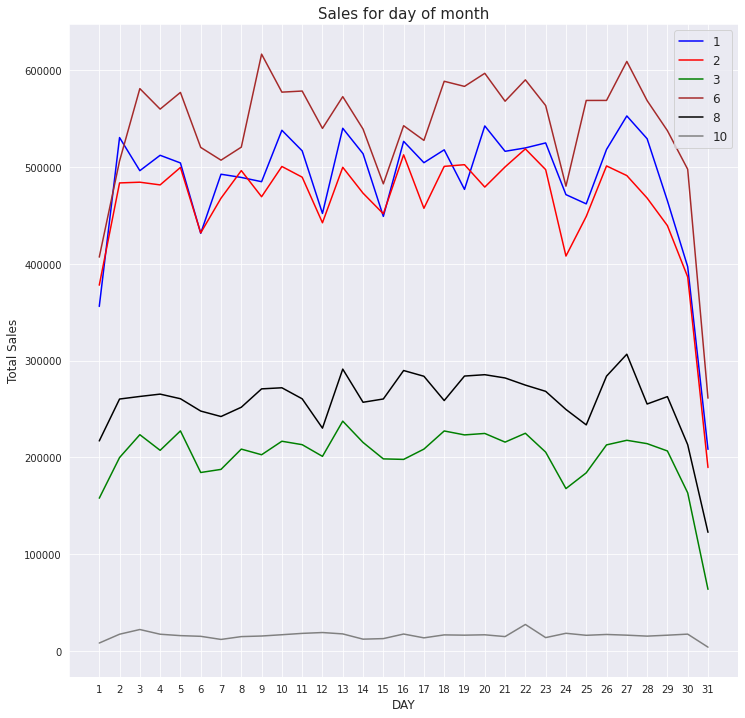

In [118]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

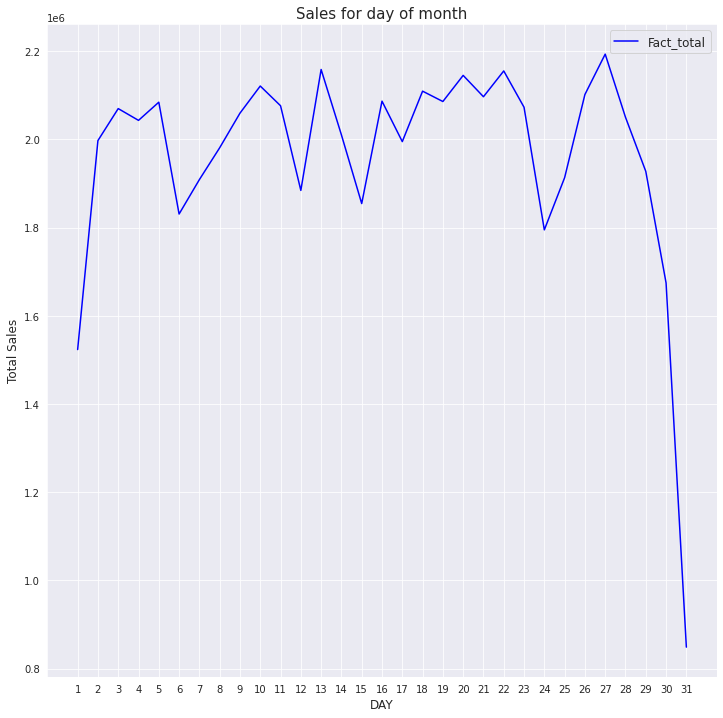

In [121]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

In [122]:
df_cohort = df.copy()

- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [123]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [124]:
df_cohort.InvoiceMonth

7        2015-01-01
9        2015-01-01
24       2015-01-01
35       2015-01-01
37       2015-01-01
            ...    
284790   2021-10-01
284795   2021-11-01
284796   2021-11-01
284797   2021-11-01
284803   2021-12-01
Name: InvoiceMonth, Length: 228842, dtype: datetime64[ns]

In [125]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('Bastidor')['InvoiceMonth'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [126]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228842 entries, 7 to 284803
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            228842 non-null  object        
 1   Referencia      228842 non-null  object        
 2   Fecha_Fact      228842 non-null  datetime64[ns]
 3   Fecha_Apertura  228842 non-null  datetime64[ns]
 4   Cta_Cargo       228842 non-null  object        
 5   Nombre_Cliente  228842 non-null  object        
 6   Cta_Titular     228842 non-null  object        
 7   Nombre_Titular  228842 non-null  object        
 8   Recamb          228842 non-null  float64       
 9   Recamb_Pvp      228842 non-null  float64       
 10  Tiemp_Fact      228842 non-null  float64       
 11  Total_Mo        228842 non-null  float64       
 12  Modelo          228842 non-null  object        
 13  Recep           228842 non-null  object        
 14  Matricula       228842 non-null  obj

In [127]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [ ]:
df_cohort.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceMonth,CohortMonth,CohortPeriod
261113,1,13250242,2021-10-25,2021-10-15,116,ORDENES DE REPARACION G,180111,RODRIGUEZ SANCHEZ GERMA,0.00,0.00,0.40,28.81,Audi A4 S,294,3171KKT,WAUZZZF49JA058984,4A GARANTIA MECAN AUDI,nan,10,2021,10,1325024,28.81,1325024,2021,10,15,4,2021-10-01,2019-10-01,24
83485,2,9659631,2017-06-07,2017-05-30,23931,PORTA YUSTAS PILAR,23931,PORTA YUSTAS PILAR,181.03,362.06,1.39,105.64,GOLF 1.8 T,85,M9582WS,WVWZZZ1JZXB084062,2V O.R.CLIENT MEC VW,nan,6,2017,8,965963,286.67,965963,2017,5,30,1,2017-05-01,2015-04-01,25
251919,8,13087111,2021-07-06,2021-07-02,610611,GASTOS PREENTREGA VN VW,127,ARVAL SERVICE LEASE SA,29.56,59.46,2.25,108.00,POLO UNITE,620,264815,WVWZZZAWZMY086020,6V O.R. INTER MEC.VW,nan,7,2021,4,1308711,137.56,1308711,2021,7,2,4,2021-07-01,2021-07-01,0
62423,2,9181602,2016-11-30,2016-11-21,98253,MUTUA MADRILEÑA AUTOMO,45740,MONREAL LAZARO JOSE ANG,0.00,0.00,15.50,659.36,GOLF SPORT,294,8274GMV,WVWZZZ1KZ9P493084,7A PRESUPUESTO CH AUDI,nan,11,2016,9,918160,659.36,918160,2016,11,21,0,2016-11-01,2014-12-01,23
160681,6,11245881,2019-03-28,2019-03-01,98253,MUTUA MADRILEÑA AUTOMOV,133438,FRANCOS COGOLLUDO ANA I,1379.14,2934.91,24.43,969.12,AUDI A3 SP,255,5081JHL,WAUZZZ8V3GA023629,7A PRESUPUESTO CH AUDI,nan,3,2019,27,1124588,2348.26,1124588,2019,3,1,4,2019-03-01,2015-07-01,44


In [67]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2005-03-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2012-11-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,443.0,34.0,25.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,584.0,24.0,19.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,471.0,22.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por mes o por fecha. 
        - por ejemplo 444 en febrero del 2022 son los nuevos clientes diferentes de la primera fecha que abril del 2004. al siguiente mes fueron 585 nuevos diferentes a abril del 2004 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo. de los clientes de febrero del 2022 despues de un mes vinieron 34, al segundo mes repitieron 25 y asi sucesivamente.  

In [ ]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
2004-04-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
2005-03-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0
2012-11-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,100.0,7.7,5.6,3.6,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,100.0,4.1,3.2,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,100.0,4.7,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,100.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


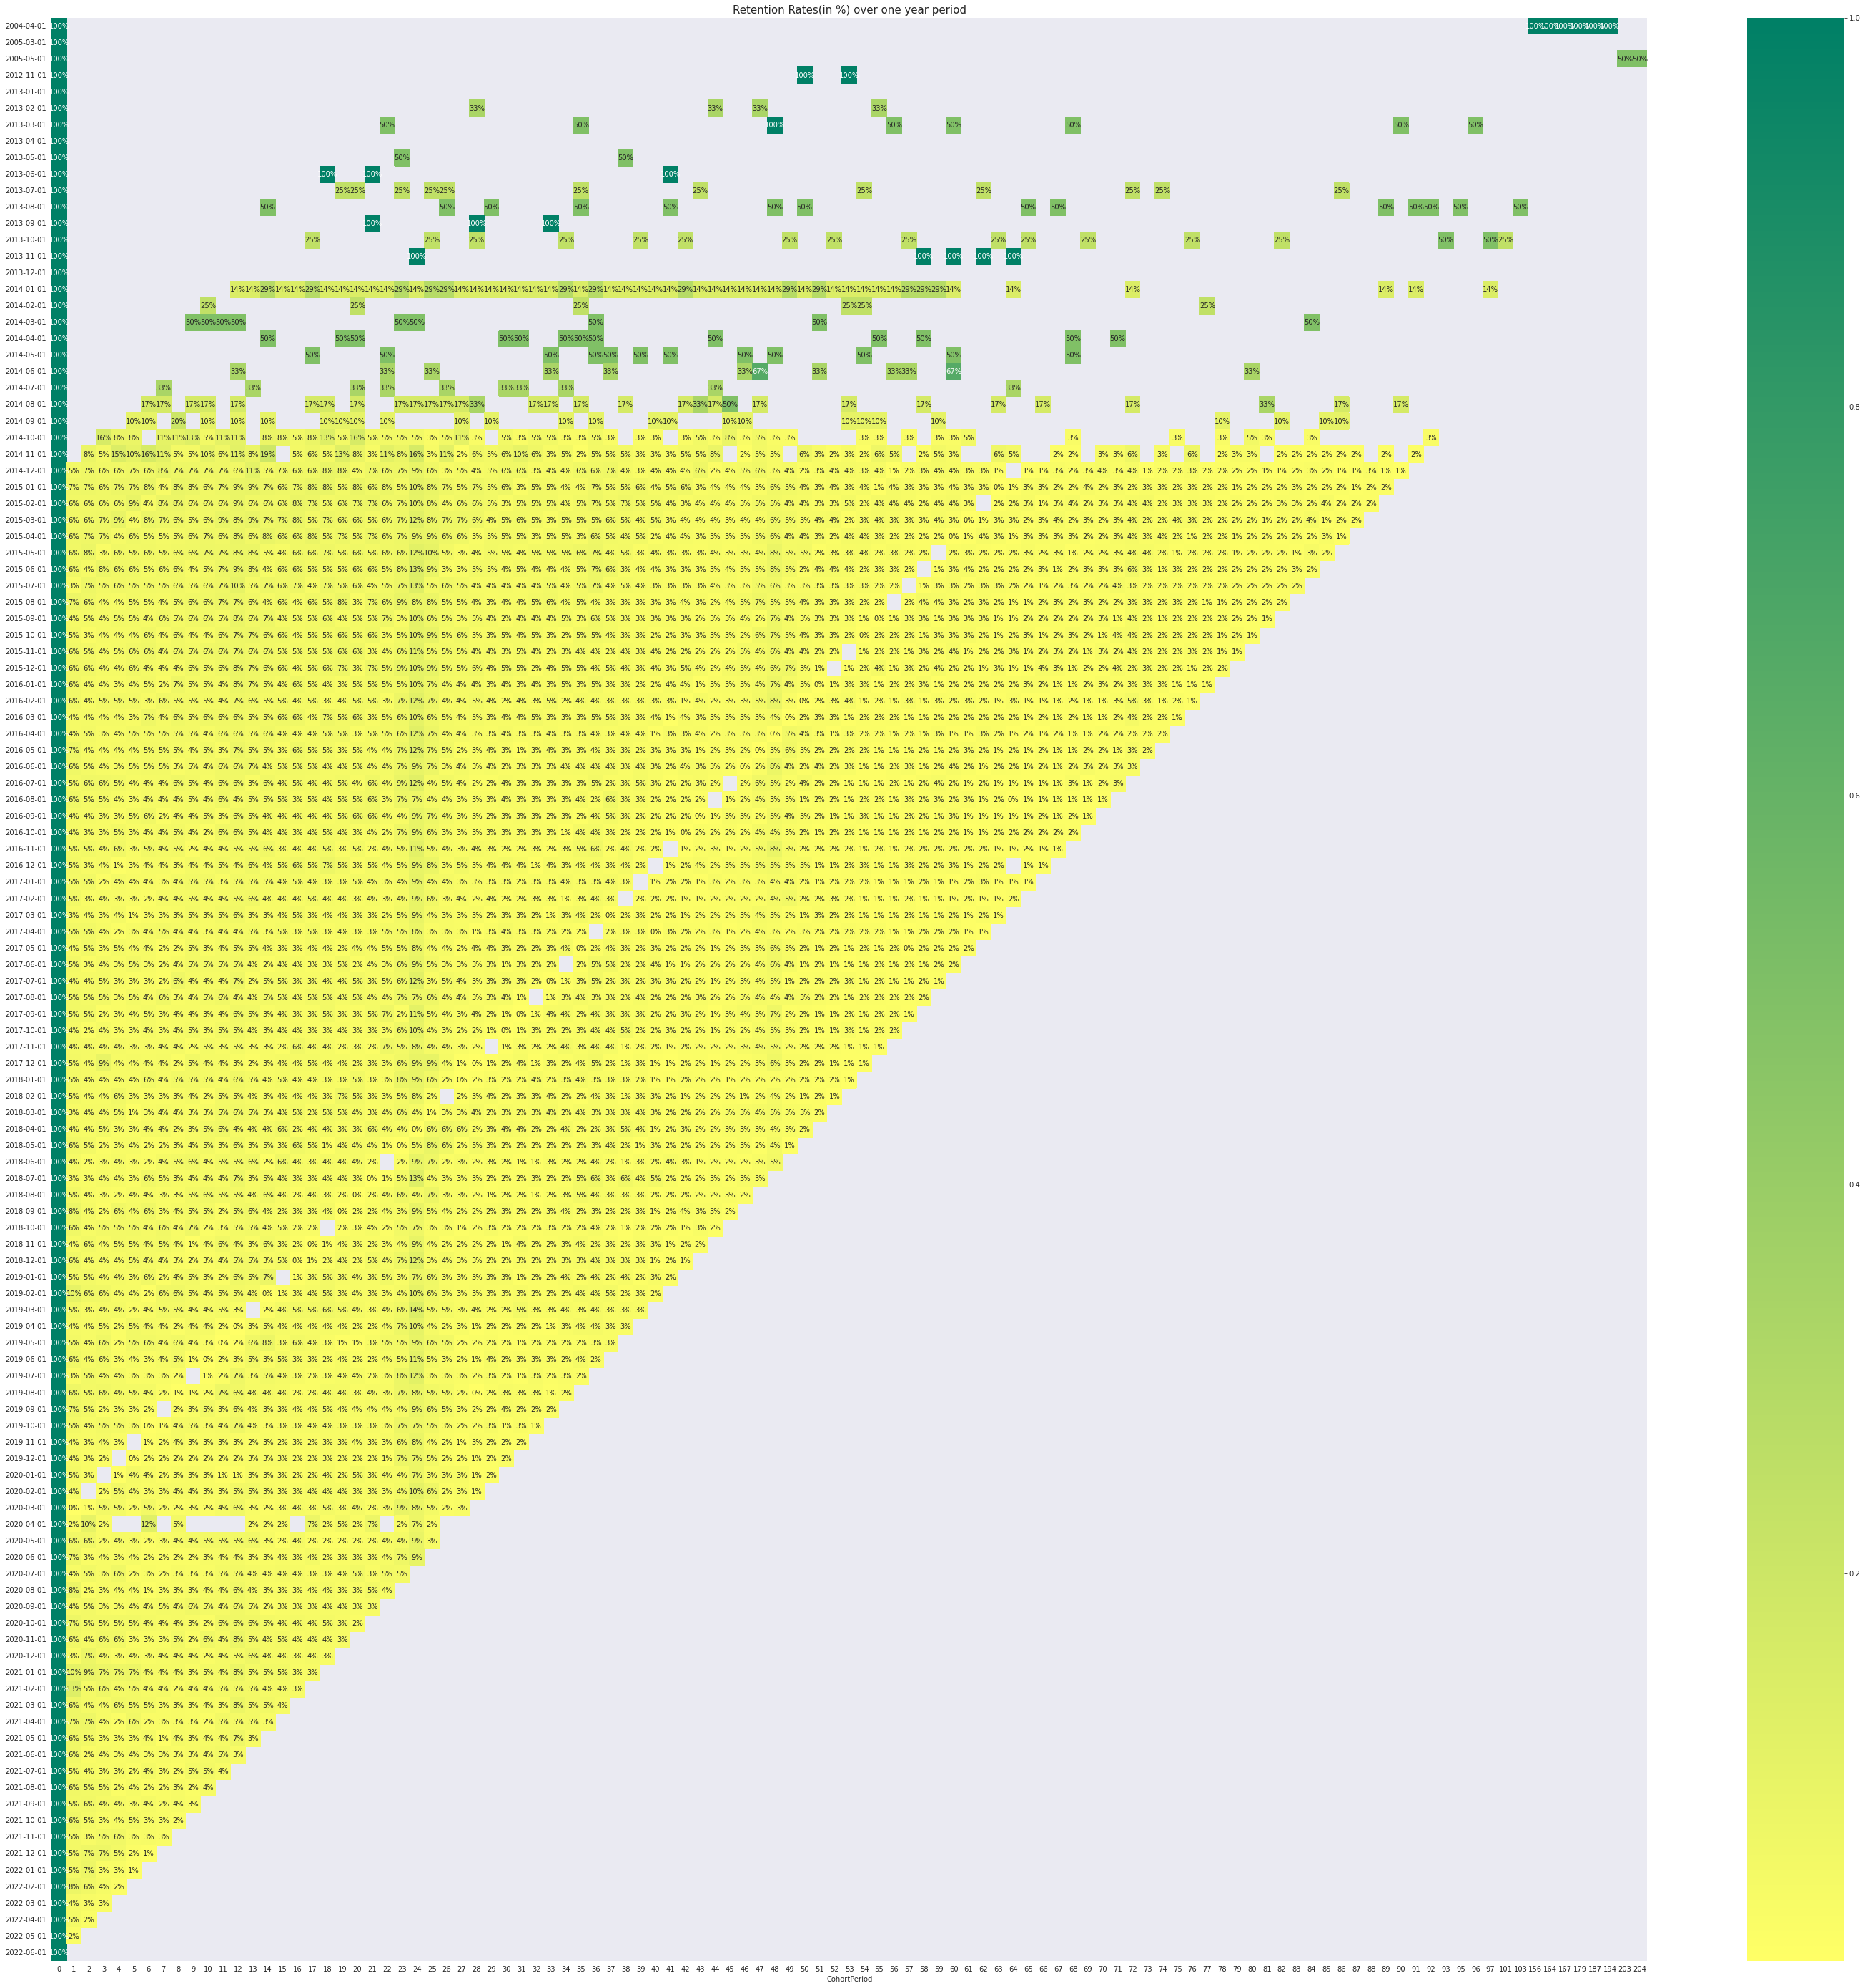

In [ ]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(50, 50))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [ ]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-01,164.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.52,314.67,437.2,275.78,686.98,860.29,NaN,NaN
2005-03-01,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,261.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.69,143.16
2012-11-01,116.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,385.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,351.96,224.24,379.18,204.60,370.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,315.33,331.81,345.61,225.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,342.50,216.42,222.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

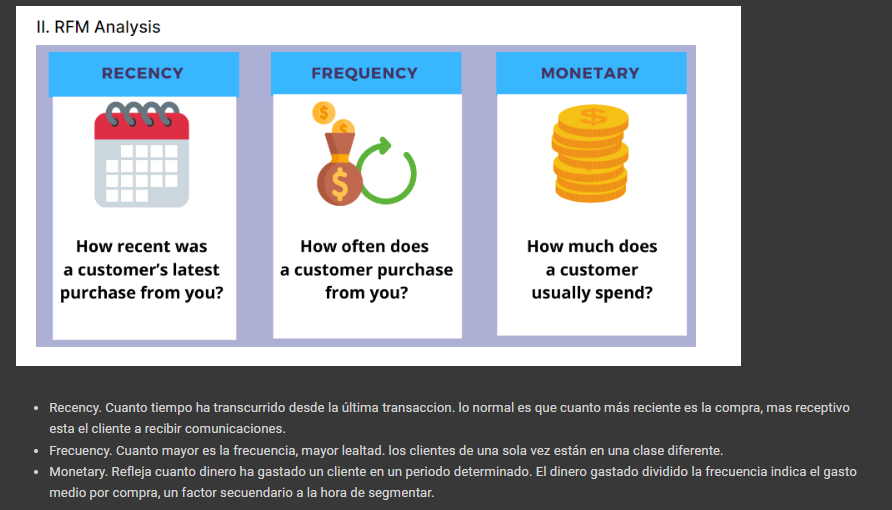

In [ ]:
df_rfm = df.copy() # hacemos la copia del original. 

In [ ]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,629
1,WAUZZZ8E55A50910,1676
2,WAUZZZ8P07A02124,385
3,WAUZZZ8P1CA04845,2275
4,WAUZZZ8T4EA06800,836


In [ ]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8E55A50910,1
2,WAUZZZ8P07A02124,2
3,WAUZZZ8P1CA04845,1
4,WAUZZZ8T4EA06800,6


In [ ]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8E55A50910,1144.53
2,WAUZZZ8P07A02124,757.33
3,WAUZZZ8P1CA04845,208.16
4,WAUZZZ8T4EA06800,4483.83


In [ ]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,629,5,1233.45
1,WAUZZZ8E55A50910,1676,1,1144.53
2,WAUZZZ8P07A02124,385,2,757.33
3,WAUZZZ8P1CA04845,2275,1,208.16
4,WAUZZZ8T4EA06800,836,6,4483.83
5,WAUZZZ8TX8A00452,1688,1,156.80
6,WAUZZZ8X1EB11477,2190,1,261.59
7,WAUZZZ8X3HB04230,1017,1,388.49
8,WVWZZZ3CZ6E13699,2002,1,826.76
9,000000000FC001550,2500,1,36.66


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [ ]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm[df_rfm['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WAUZZZ4L97D07664,452.0
1,WAUZZZ8E55A50910,0.0
2,WAUZZZ8P07A02124,0.0
3,WAUZZZ8P1CA04845,0.0
4,WAUZZZ8T4EA06800,211.0


In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit.csv")

In [ ]:
df_rfm.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58009 entries, 0 to 58008
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   58009 non-null  object 
 1   recency    58009 non-null  int64  
 2   frequency  58009 non-null  int64  
 3   monetary   58009 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary
count,58009.000000,58009.000000,5.800900e+04
mean,1032.668396,3.111259,1.647268e+03
std,801.510613,3.562207,5.798476e+03
min,1.000000,1.000000,0.000000e+00
25%,302.000000,1.000000,2.491900e+02
50%,888.000000,2.000000,7.510300e+02
75%,1688.000000,4.000000,2.007120e+03
90%,2253.000000,7.000000,4.123256e+03
95%,2486.000000,9.000000,5.877614e+03
99%,2695.000000,13.000000,1.074724e+04


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.
